# Wall

In [1]:
import CairoMakie: update_theme!

using Revise
using MMJMesh
using MMJMesh.Meshes
using MMJMesh.Plots
using LinearAlgebra

include("fem.jl")
include("heat.jl")
update_theme!(colormap=:acton)

## Parameters

In [2]:
ti = 20
hi = 1 / 0.13
ta = -10
ha = 1 / 0.04

25.0

## Mesh

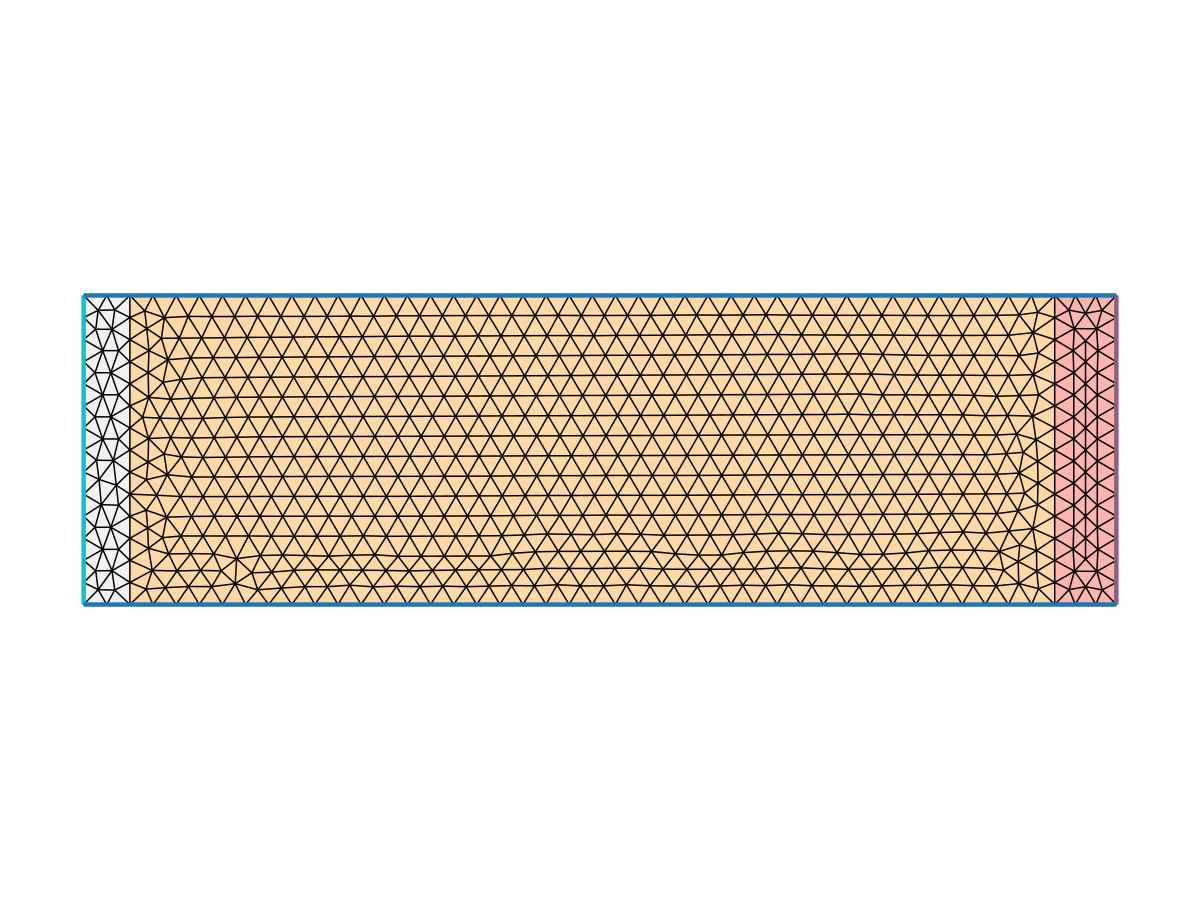

In [10]:
m = Mesh("gmsh/wall.msh")
mplot(m, edgesvisible=true) |> mconf()

## Solution

### Define problem

In [ ]:
setdata!(group(m, :s1), :ke_func, heat_ke(0.7))
setdata!(group(m, :s2), :ke_func, heat_ke(0.24))
setdata!(group(m, :s3), :ke_func, heat_ke(0.87))

setdata!(group(m, :wi), :ke_func, robin_ke(hi))
setdata!(group(m, :wi), :re_func, robin_re(hi, ti))

setdata!(group(m, :wa), :ke_func, robin_ke(ha))
setdata!(group(m, :wa), :re_func, robin_re(ha, ta))


### Set up and solve linear system

In [6]:
K, r = assemble_kr(m);
θHat =  K \ r;

## Results

### Temperature distribution

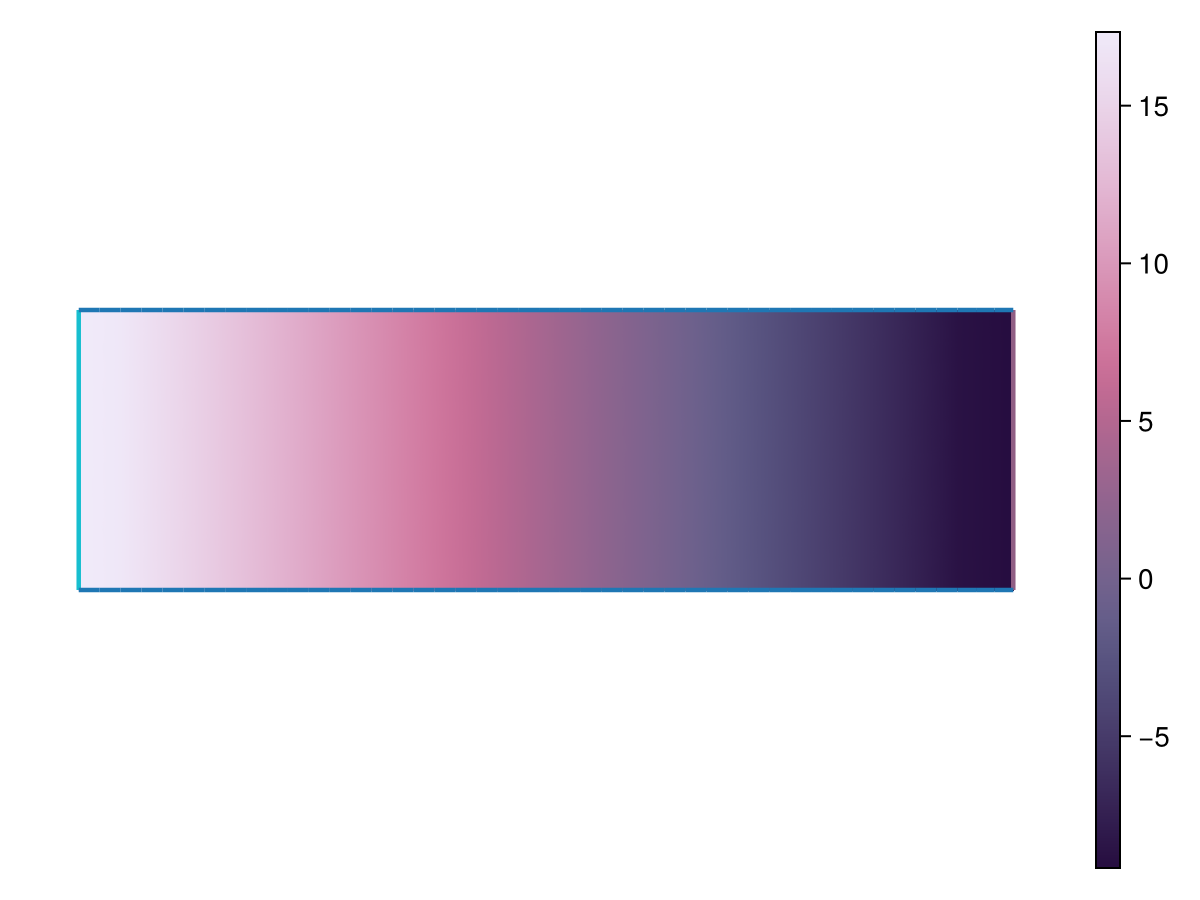

In [7]:
mplot(m, θHat) |> mconf()

### Results

In [8]:
function findNodeAt(m, p) 
    for n ∈ nodes(m)
        if norm(coordinates(n) - p) < 1e-10
            return n.index
        end
    end
    return -1
end

println("1: ", θHat[findNodeAt(m, [0.0; 0])])
println("2: ", θHat[findNodeAt(m, [0.015; 0])])
println("3: ", θHat[findNodeAt(m, [0.315; 0])])
println("4: ", θHat[findNodeAt(m, [0.335; 0])])

1: 17.336824282654728
2: 16.897839274301113
3: -8.709619546326053
4: -9.180561317739897


Values correspond to example from Fischer et al. 